# Lab 6 & 7a: Support Vector Machines (SVM)
#### Name:- Sruthi Nayagi 
#### Reg.no:- 19BAI1037 
#### Subject:- Computer Vision in Healthcare Application (CSE4038) 
#### Faculty-In-Charge:- Dr.BALASUNDARAM A
#### Lab Slot:- L27+L28 
#### Date of Submission:- 03/3/2022
#### Dataset Used:- Prostrate_Cancer

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the csv file 

In [2]:
df1 = pd.read_csv(r"C:\Users\LENOVO\Desktop\Backup OneDrive\SEM 4\ML LAB\Prostate_Cancer.csv")

In [3]:
df1.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [4]:
df1.shape

(100, 9)

This dataset has 100 rows and 9 columns

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis_result   100 non-null    object 
 1   radius             100 non-null    int64  
 2   texture            100 non-null    int64  
 3   perimeter          100 non-null    int64  
 4   area               100 non-null    int64  
 5   smoothness         100 non-null    float64
 6   compactness        100 non-null    float64
 7   symmetry           100 non-null    float64
 8   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 7.2+ KB


# Exploratory Data Analysis

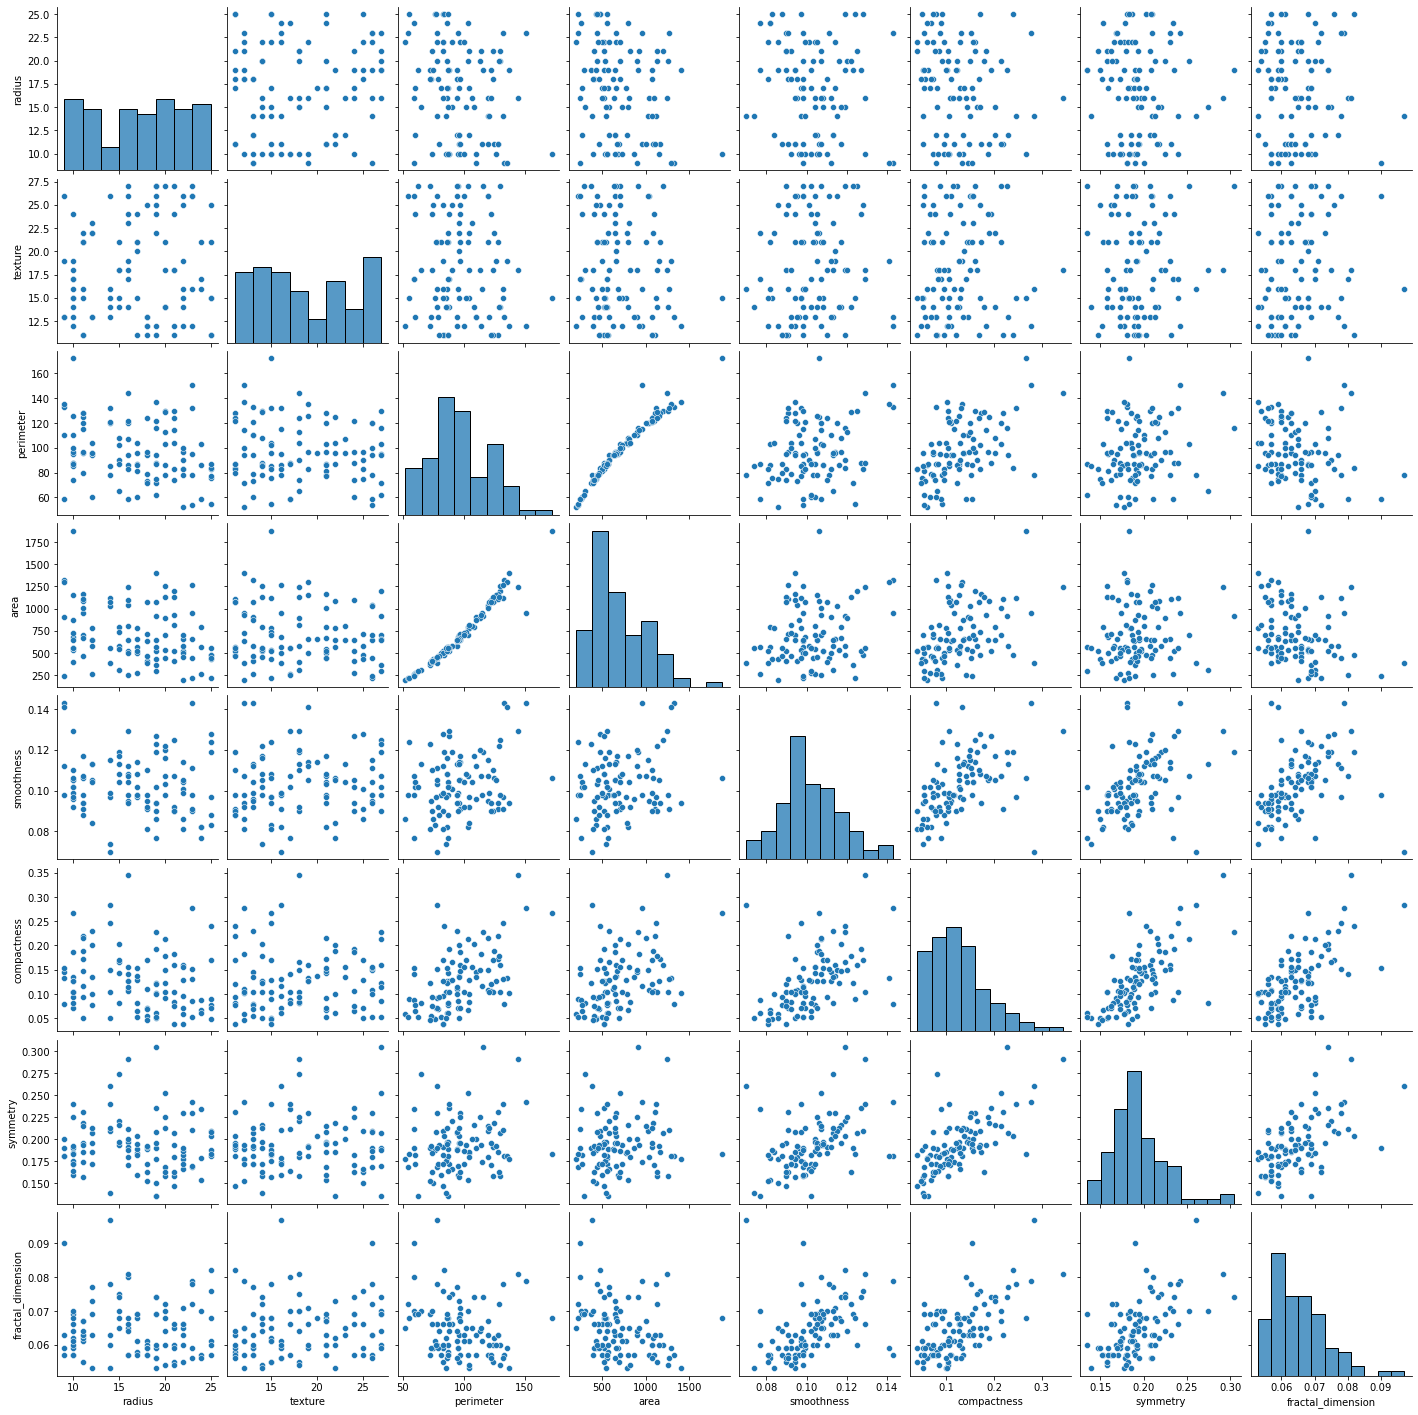

In [6]:
sns.pairplot(df1)

<AxesSubplot:xlabel='diagnosis_result', ylabel='count'>

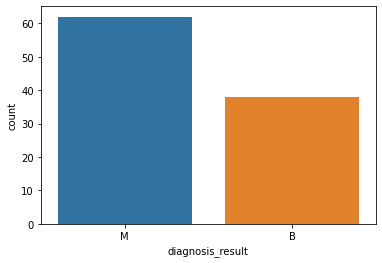

In [10]:
sns.countplot(x='diagnosis_result',data=df1)

## Inference : 
This plot gives us a count of the class M & B

<AxesSubplot:>

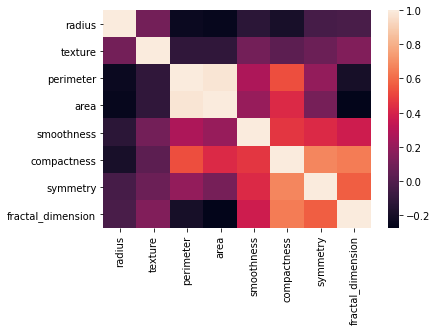

In [11]:
sns.heatmap(df1.corr())

<AxesSubplot:xlabel='diagnosis_result', ylabel='radius'>

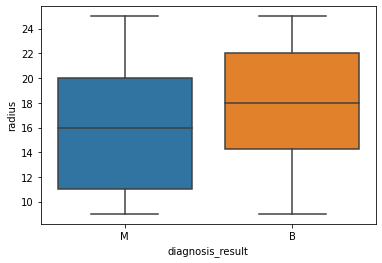

In [13]:
sns.boxplot(x="diagnosis_result", y="radius", data=df1)

## Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('diagnosis_result',axis=1), 
                                                    df1['diagnosis_result'], test_size=0.30, 
                                                    random_state=101)

# SVM

In [16]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

# Prediction and evaluation

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
predictions = model.predict(X_test)

In [19]:
print(confusion_matrix(y_test,predictions))

[[10  3]
 [ 4 13]]


In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           B       0.71      0.77      0.74        13
           M       0.81      0.76      0.79        17

    accuracy                           0.77        30
   macro avg       0.76      0.77      0.76        30
weighted avg       0.77      0.77      0.77        30



**Inference : From the above classification report we can check presicion, recall and f1 score.This model has a precision od 0.71 for class B and 0.81 for class A.The accuracy of this model is about 77%.**

In [21]:
from sklearn import metrics
metrics.accuracy_score(y_test,predictions)

0.7666666666666667

## Conclusion:
The accuracy of this model is 76.7% 